Лабораторная №2.

Начинаем с подключения библиотек. В этот раз добавляется skimage.restoration,
которая пригодится для обработки шума.

In [1]:
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.restoration import denoise_nl_means
from skimage.metrics import structural_similarity, mean_squared_error

Мне показалось уместным написать функцию, которая выводит одновременно исходник и изображение, которое мы скормим ей.

In [3]:
def imshow(new_image, new_title):
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.imshow(image, cmap='gray')
    plt.title('Исходник')

    plt.subplot(1,2,2)
    plt.imshow(new_image, cmap='gray')
    plt.title(new_title)

    plt.show()

Для сравнения результатов фильтрации нам понадобится функция для вычисления MSE и SSIM.

In [19]:
def calculate_metrics(original, filtered):
    mse = mean_squared_error(original, filtered)
    ssim = structural_similarity(original, filtered, data_range=255)
    return mse, ssim

Загружаем изображение.

In [21]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
original_image = image_gray.copy() # сохраним ориг изображение для сравнения 

Шаг первый. Зашумить исходник с помощью шума Гаусса.

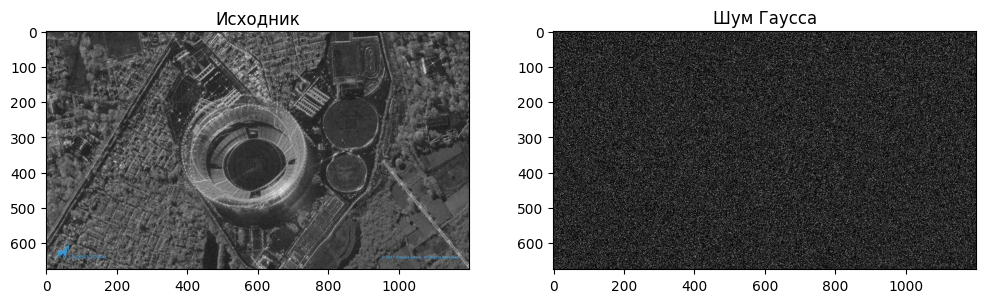

In [7]:
mean = 0   # точка отсчета
stddev = 100 # отклонение
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

imshow(noise_gauss, 'Шум Гаусса')

Теперь применим к исходнику постоянный шум.

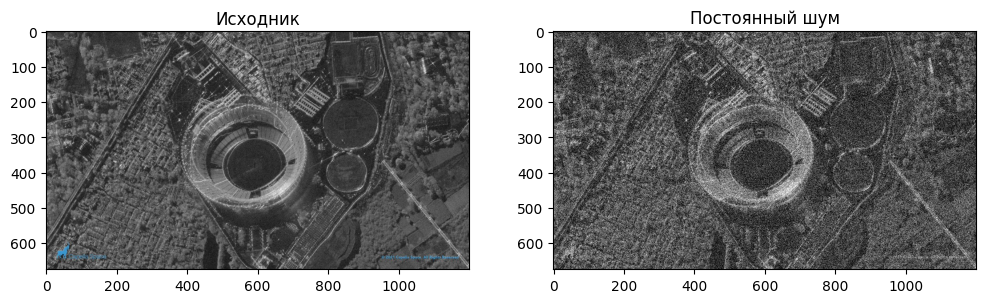

In [8]:
noise_strength=100
noise = np.random.uniform(-noise_strength, noise_strength, image_gray.shape)
noisy_image = image_gray + noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

imshow(noisy_image, 'Постоянный шум')

По скольку дальше объектом сравнения будет картинка с постоянным шумом вместо исходника, то я подставил в функцию её.
Надо было конечно изначально написать функцию для вывода двух изображений, но мне прям ваще лень переделывать,
потому что я не сразу заметил, что дальше сравнивать придется с постоянным шумом, ведь мы убираем этот шум.

In [10]:
def nimshow(new_image, new_title):
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.imshow(noisy_image, cmap='gray')
    plt.title('Исходник, обработанный постоянным шумом')

    plt.subplot(1,2,2)
    plt.imshow(new_image, cmap='gray')
    plt.title(new_title)

    plt.show()

Для хранения результатов фильтрации нам понадобится массив

In [23]:
results = {}

Шаг второй. Обработка картинки медианным фильтром.

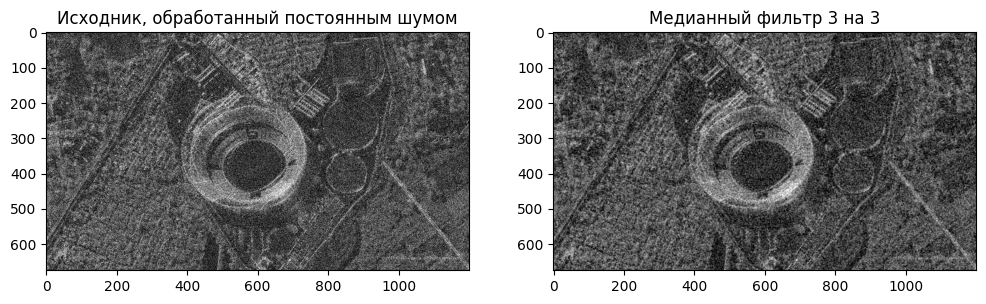

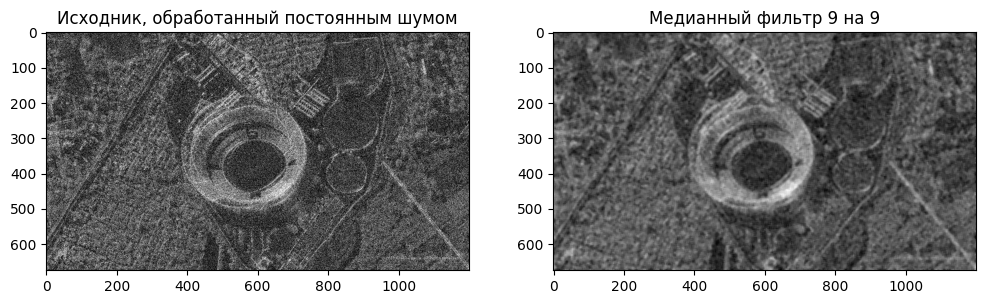

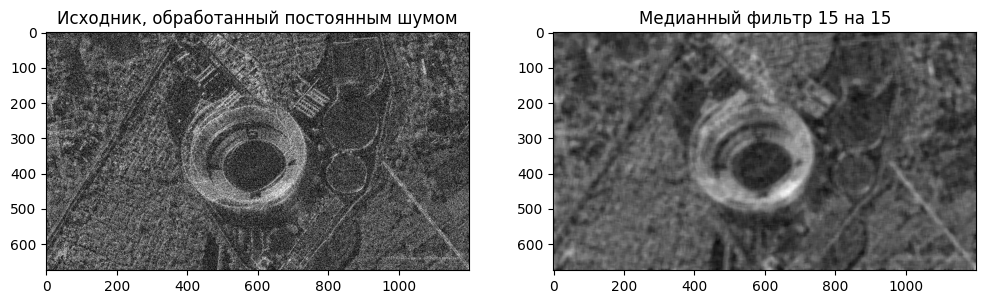

In [24]:
image_gauss_median = cv2.medianBlur(noisy_image, 3)
mse, ssim = calculate_metrics(original_image, image_gauss_median)
results['Медианный 3x3'] = {'mse': mse, 'ssim': ssim}
nimshow(image_gauss_median, 'Медианный фильтр 3 на 3')

image_gauss_median = cv2.medianBlur(noisy_image, 9)
mse, ssim = calculate_metrics(original_image, image_gauss_median)
results['Медианный 9x9'] = {'mse': mse, 'ssim': ssim}
nimshow(image_gauss_median, 'Медианный фильтр 9 на 9')

image_gauss_median = cv2.medianBlur(noisy_image, 15)
mse, ssim = calculate_metrics(original_image, image_gauss_median)
results['Медианный 15x15'] = {'mse': mse, 'ssim': ssim}
nimshow(image_gauss_median, 'Медианный фильтр 15 на 15')

Обработка картинки билатериальным фильтром.

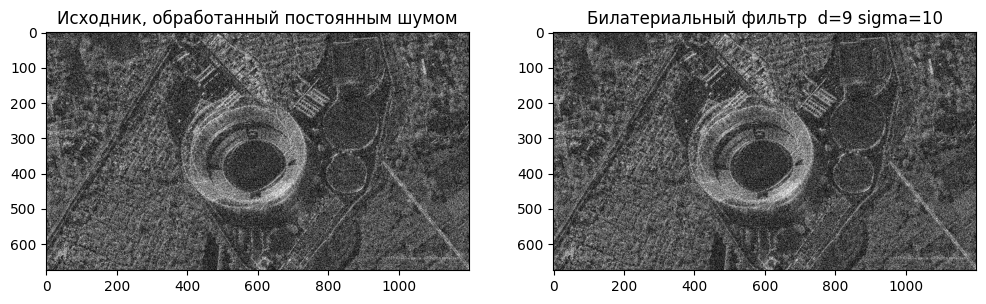

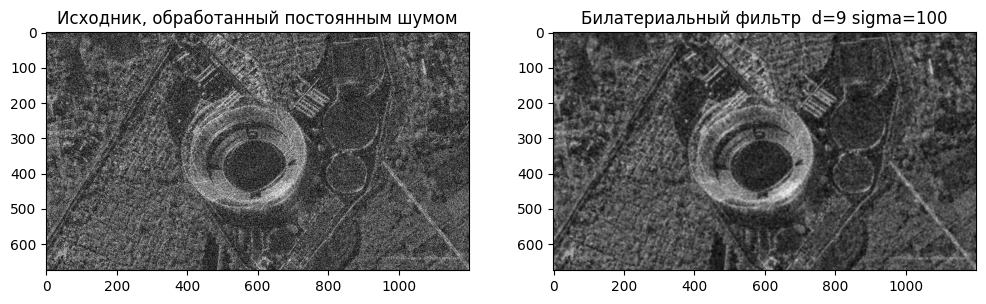

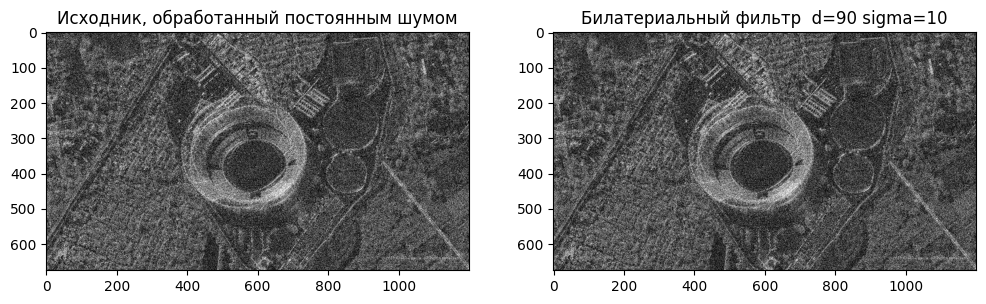

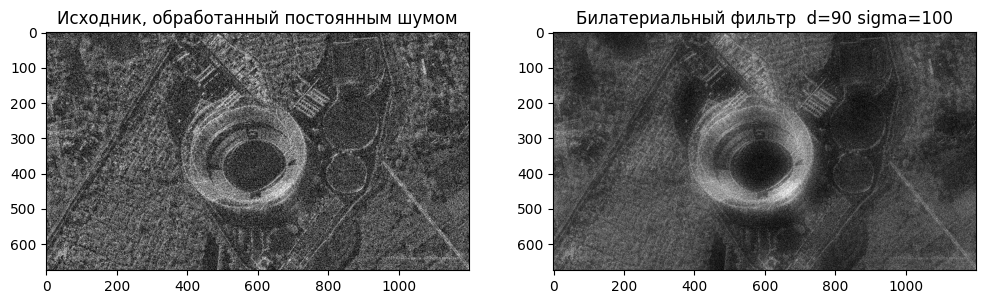

In [25]:
image_gauss_bilat = cv2.bilateralFilter(noisy_image,9,10,10)
mse, ssim = calculate_metrics(original_image, image_gauss_bilat)
results['Билатеральный d=9 σ=10'] = {'mse': mse, 'ssim': ssim}
nimshow(image_gauss_bilat, 'Билатериальный фильтр  d=9 sigma=10')

image_gauss_bilat = cv2.bilateralFilter(noisy_image,9,100,100)
mse, ssim = calculate_metrics(original_image, image_gauss_bilat)
results['Билатеральный d=9 σ=100'] = {'mse': mse, 'ssim': ssim}
nimshow(image_gauss_bilat, 'Билатериальный фильтр  d=9 sigma=100')

image_gauss_bilat = cv2.bilateralFilter(noisy_image,90,10,10)
mse, ssim = calculate_metrics(original_image, image_gauss_bilat)
results['Билатеральный d=90 σ=10'] = {'mse': mse, 'ssim': ssim}
nimshow(image_gauss_bilat, 'Билатериальный фильтр  d=90 sigma=10')

image_gauss_bilat = cv2.bilateralFilter(noisy_image,90,100,100)
mse, ssim = calculate_metrics(original_image, image_gauss_bilat)
results['Билатеральный d=90 σ=100'] = {'mse': mse, 'ssim': ssim}
nimshow(image_gauss_bilat, 'Билатериальный фильтр  d=90 sigma=100')


Обработка картинки фильтром нелокальных средних с разными параметрами

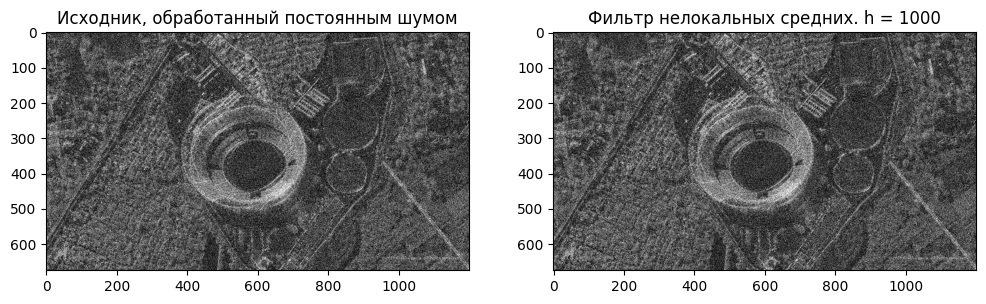

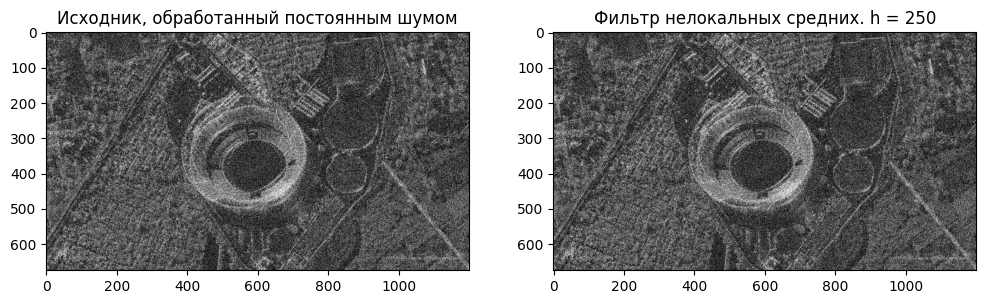

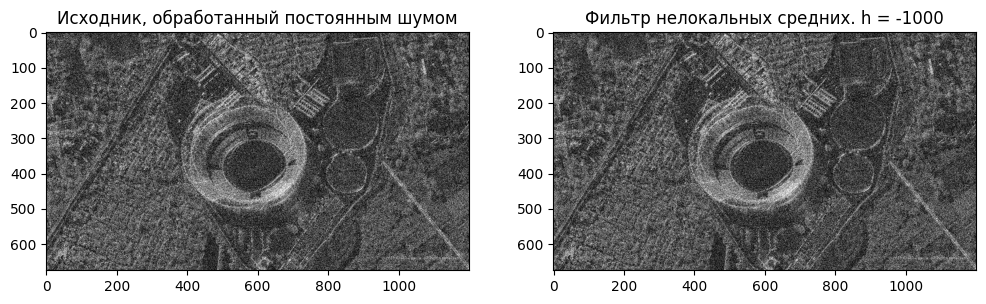

In [ ]:
im1 = cv2.fastNlMeansDenoising(noisy_image, None, 1000)
mse, ssim = calculate_metrics(original_image, im1)
results['Нелокальные h=1000'] = {'mse': mse, 'ssim': ssim}
nimshow(im1, 'Фильтр нелокальных средних. h = 1000')

im1 = cv2.fastNlMeansDenoising(noisy_image, None, 250)
mse, ssim = calculate_metrics(original_image, im1)
results['Нелокальные h=250'] = {'mse': mse, 'ssim': ssim}
nimshow(im1, 'Фильтр нелокальных средних. h = 250')

im1 = cv2.fastNlMeansDenoising(noisy_image, None, 10)
mse, ssim = calculate_metrics(original_image, im1)
results['Нелокальные h=10'] = {'mse': mse, 'ssim': ssim}
nimshow(im1, 'Фильтр нелокальных средних. h = 10')

Для удобства выведем метрики для каждого фильтра, параллельно ищем лучшие фильтры.

In [27]:
print("\nРЕЗУЛЬТАТЫ РАЗЛИЧНЫХ ФИЛЬТРОВ:\n")
best_mse = float('inf')
best_ssim = -float('inf')
best_filter_mse = None
best_filter_ssim = None

for name, metrics in results.items():
    mse, ssim = metrics['mse'], metrics['ssim']
    print(f"{name:25} | MSE: {mse:7.2f} | SSIM: {ssim:.4f}")
    
    if mse < best_mse:
        best_mse = mse
        best_filter_mse = name
    if ssim > best_ssim:
        best_ssim = ssim
        best_filter_ssim = name


РЕЗУЛЬТАТЫ РАЗЛИЧНЫХ ФИЛЬТРОВ:

Медианный 3x3             | MSE:  965.56 | SSIM: 0.3067
Медианный 9x9             | MSE:  437.85 | SSIM: 0.3407
Медианный 15x15           | MSE:  479.63 | SSIM: 0.2796
Билатеральный d=9 σ=10    | MSE: 2843.77 | SSIM: 0.1793
Билатеральный d=9 σ=100   | MSE:  450.15 | SSIM: 0.4217
Билатеральный d=90 σ=10   | MSE: 2829.91 | SSIM: 0.1790
Билатеральный d=90 σ=100  | MSE:  627.14 | SSIM: 0.3324


Выводим лучшие фильтры.

In [28]:
print("\nЛУЧШИЕ ФИЛЬТРЫ:\n")
print(f" Лучший по MSE:  {best_filter_mse} (MSE = {best_mse:.2f})")
print(f" Лучший по SSIM: {best_filter_ssim} (SSIM = {best_ssim:.4f})")


ЛУЧШИЕ ФИЛЬТРЫ:

 Лучший по MSE:  Медианный 9x9 (MSE = 437.85)
 Лучший по SSIM: Билатеральный d=9 σ=100 (SSIM = 0.4217)
